The FFT will give you the frequency content of the entire sample, but cannot give you information at a particular time. The STFT breaks up the sample into short sections, and gives you the frequency content of the short sections, which can be stitched together to indicate frequency content over time.
The FFT output will have the same magnitude between the first and second half, but the output in the second half will be the complex conjugate of the output in the first half.

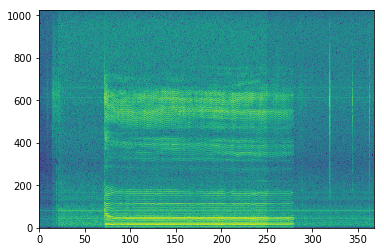

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from numpy.fft import fft, ifft

FRAME_SIZE = 1024
ZP_FACTOR = 2
FFT_SIZE = FRAME_SIZE * ZP_FACTOR


################## YOUR CODE HERE ######################
def ece420ProcessFrame(frame):
    curFft = np.zeros(FFT_SIZE)
    w = np.hamming(FRAME_SIZE)
    curFft[0:FRAME_SIZE-1] = [w[n]*frame[n] for n in range(0,FRAME_SIZE-1)]
    curFft = fft(curFft)
    curFft = np.log10(np.square(np.abs(curFft)))
    return curFft[:FRAME_SIZE]


################# GIVEN CODE BELOW #####################

Fs, data = read('test_vector.wav')

numFrames = int(len(data) / FRAME_SIZE)
bmp = np.zeros((numFrames, FRAME_SIZE))

curFft = []

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    curFft = ece420ProcessFrame(frame)
    bmp[i, :] = curFft
bmp = bmp/np.max(bmp)
    
# plt.plot(np.square(np.abs(curFft)))


plt.figure()
plt.pcolormesh(bmp.T, vmin=0, vmax=1)
#plt.yscale('log')
plt.axis('tight')
plt.show()

Given a buffer of size $N$ and sampling rate $F_s$, you would have $\frac{N}{F_s}$ to complete processesing before the next buffer comes in.